In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



{'CA': 49, 'TX': 109, 'FL': 112, 'NY': 52, 'PA': 212, 'IL': 69, 'OH': 120, 'GA': 65, 'NC': 80, 'MI': 110, 'NJ': 91, 'VA': 145, 'WA': 159, 'AZ': 109, 'MA': 91, 'TN': 89, 'IN': 110, 'MS': 30, 'MD': 84, 'WI': 78, 'CO': 128, 'MN': 89, 'SC': 31, 'AL': 49, 'LA': 38, 'KY': 62, 'OR': 109, 'OK': 0, 'CT': 0, 'IA': 0, 'UT': 0, 'NV': 0, 'AK': 0, 'MP': 0, 'KS': 0, 'NM': 0, 'NE': 0, 'WV': 0, 'ID': 0, 'HI': 0, 'NH': 0, 'ME': 0, 'MT': 0, 'RI': 0, 'DE': 0, 'SD': 0, 'ND': 0, 'DC': 0, 'VT': 0, 'WY': 0}
CA
NY
IL
GA
MS
SC
AL
LA
KY


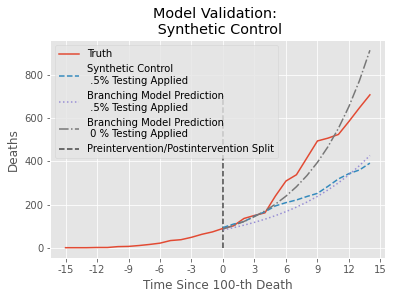

AssertionError: 

In [16]:
df = pd.read_csv('all-states-history.csv')
dfpop = pd.read_csv('statePops.csv')





stateAbbrvs= dfpop['State'].values

# plt.figure(figsize=(10,10))

#when do states cross .2 % testing for the first time

test_times={s:0 for s in stateAbbrvs}

PAdf = df[df['state']== 'PA']

PAtimeseries = np.flip(PAdf['death'].values)[12:42]

for s in stateAbbrvs:
    
    
    statePop = dfpop[dfpop['State']==s]['Population'].values[0]


    #totalTestResultsIncrease
#     print(statePop)
    dfnew= df[df['state'] == s]
    
    
    percent_population_tested = []

    total_tests = np.flip(dfnew['totalTestResultsIncrease'].values)


    for i in range(dfnew.shape[0]):
        percent_population_tested.append(total_tests[i]/statePop)

    tarray=np.copy(np.array(percent_population_tested))

    percent_population_tested = np.array(percent_population_tested)
    
    
    for i in range(len(percent_population_tested)):
        if percent_population_tested[i] > .002 and statePop > 4000000:
            test_times[s]= i
            break
    


    for i in range(30,dfnew.shape[0]):
        percent_population_tested[i]= np.mean(tarray[i-30:i])
    #     if i == 100:
    #         print(percent_population_tested[i-3:i])
    #         print(np.mean(percent_population_tested[i-3:i]))
    #         assert False



#     plt.plot(percent_population_tested[30:], label = s)
    
# plt.legend()
# plt.show()

print(test_times)

regression_data = []

for kval in list(test_times.keys()):
    if 0<test_times[kval] <70:
        print(kval)
        timeseriesData= np.flip(df[df['state']==kval]['death'].values)
        regression_data.append(timeseriesData[test_times[kval]-15:test_times[kval]+15])
regression_data = np.array(regression_data).T

     
train_data = regression_data[:15,:]

predict_data = regression_data[15:,:]


PAtrain = PAtimeseries[:15]

invMat = np.linalg.inv(train_data.T.dot(train_data))
weights = invMat.dot(train_data.T.dot(PAtrain))

# train_predict = train_data.dot(weights)
# print(train_predict)

# plt.figure()
# plt.plot(train_predict, label = 'prediction')
# plt.plot(PAtrain, label = 'truth')
# plt.legend()
# plt.show()

# assert False


syntheticControlPA = list(predict_data.dot(weights))

syntheticControlPA = np.array(list(PAtrain)+syntheticControlPA)


R0 = 2.85

lambdaVal=1+(R0/14) - .004 - ((1-.004)/14)
lambdaVal*=.996

lambdaVal2 = 1.052*lambdaVal

mean_predicted_value = [lambdaVal*PAtrain[-1]]
mean_predicted_value2 = [lambdaVal2*PAtrain[-1]]

for i in range(14):
    mean_predicted_value.append(lambdaVal*mean_predicted_value[-1])
    mean_predicted_value2.append(lambdaVal2*mean_predicted_value2[-1])

mean_predicted_value = np.array(list(PAtrain)+mean_predicted_value)
mean_predicted_value2 = np.array(list(PAtrain)+mean_predicted_value2)

plt.style.use('ggplot')

plt.figure()
plt.title('Model Validation: \n Synthetic Control')
plt.plot(PAtimeseries,label= 'Truth')
plt.plot(np.arange(15,30),syntheticControlPA[15:],linestyle = '--', label = 'Synthetic Control \n .5% Testing Applied')
plt.plot(np.arange(15,30),mean_predicted_value[15:],linestyle = ':',label = 'Branching Model Prediction \n .5% Testing Applied')
plt.plot(np.arange(15,30),mean_predicted_value2[15:],linestyle = '-.',label = 'Branching Model Prediction \n 0 % Testing Applied')
plt.vlines(15,0,700,linestyle= '--', alpha = .7,label = 'Preintervention/Postintervention Split')
plt.ylabel('Deaths')
plt.xlabel('Time Since 100-th Death')
plt.xticks(np.arange(31,step = 3),np.arange(31,step =3)-15)
plt.legend()
plt.savefig('ModelValidationSyntheticControl.png', bbox_inches = "tight")
plt.show()



# PApredict = 

assert False






In [ ]:
#calculate R0 values?

#let's say that the d=14

#what is the timeseries for the number of infections in, say, PA?

PAinfections = np.flip(df[df['state'] == 'PA']['death'].values)[12:42]

print(PAinfections)

plt.plot(PAinfections)



calculate_R0 = []
for i in range(1,15):
    calculate_R0.append(np.exp(np.log(PAinfections[i]/PAinfections[i-1])*7))
print(sum(calculate_R0)/(len(calculate_R0)))

In [ ]:
#For each row, we essentially need to 